#Connect to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Loading Model

In [4]:
cnn = tf.keras.models.load_model("/content/drive/MyDrive/Fruit_Vegetable_Dataset/trained_model.keras")

#Visualization and Performing Prediction on single image

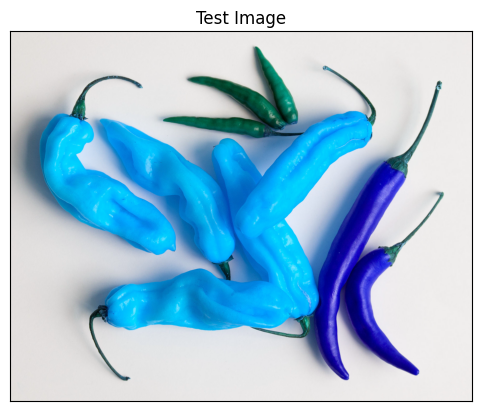

In [5]:
import cv2
image_path = "/content/drive/MyDrive/Fruit_Vegetable_Dataset/test/chilli pepper/Image_1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = np.array([tf.keras.preprocessing.image.img_to_array(image)])
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


In [7]:
print(predictions[0])
print(max(predictions[0]))

[4.5969303e-10 1.3797014e-10 2.6299649e-10 4.4881631e-07 4.1687397e-11
 1.2840754e-07 1.8228609e-09 9.1822514e-09 9.9999940e-01 8.1332346e-10
 1.3392528e-11 3.5114352e-11 5.0455853e-09 2.9160976e-09 2.7509290e-09
 1.8465578e-10 3.2647534e-09 1.4552537e-12 3.3871808e-09 7.2611670e-13
 1.6323765e-12 1.8549574e-12 1.0944939e-10 2.1629191e-08 2.6332928e-10
 6.5622514e-11 1.1498154e-09 3.9019224e-10 3.7318715e-10 3.6677935e-08
 1.8868031e-10 3.7831641e-10 1.7438513e-12 3.2254055e-10 5.2938304e-10
 3.2774762e-12]
0.9999994


In [8]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [9]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

8


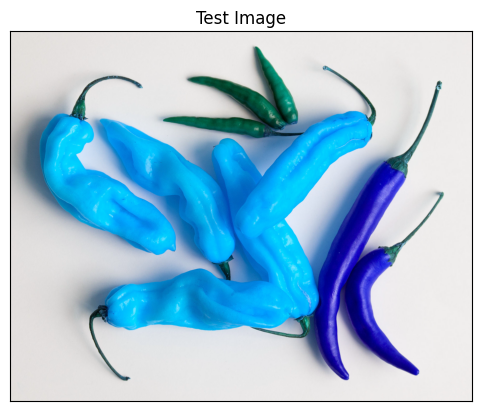

In [ ]:
#Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Single Prediction
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a chilli pepper


#Test set Evaluation

In [ ]:
cnn.evaluate(test_set)

12/12 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.9155 - loss: 1.2434


[1.0628421306610107, 0.9080780148506165]